### Red neuronal de una capa

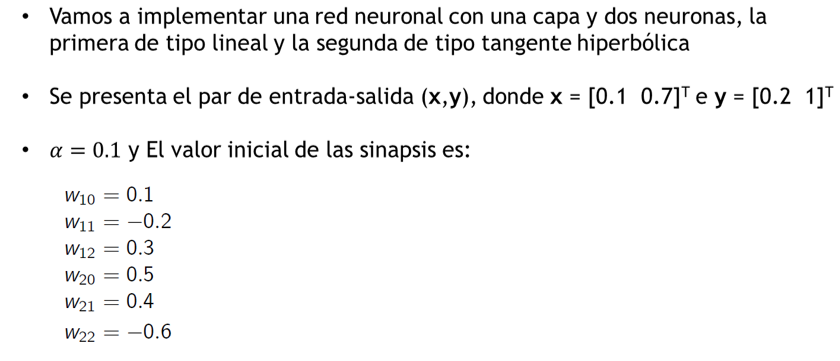

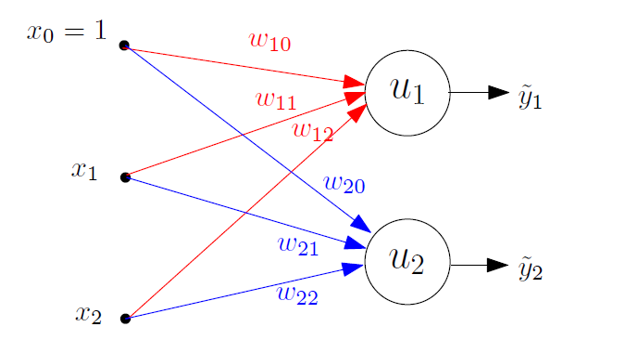

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Inicializa las entradas, el learning rate y los valores de las sinapsis

In [3]:
x0 = 1
x1 = 0.1
x2 = 0.7

y1 = 0.2
y2 = 1

w10 = 0.1
w11 = -0.2
w12 = 0.3

w20 = 0.5
w21 = 0.4
w22 = -0.6

alpha = 0.1

Para 100 pasos de entrenamiento:   

1) Calcula los valores $u_1$, $u_2$  
2) Calcula los valores $\hat{y}_1$ e $\hat{y}_2$  
3) Calcula los errores $\epsilon_1$ e $\epsilon_2$  y almacena el error cuadrático medio  
4) Calcula los errores retropropagados $\delta_1$ y $\delta_2$  
5) Calcula el nuevo valor de las sinapsis $w_{ij} \rightarrow w_{ij}+\Delta w_{ij}$

In [4]:
et = []
for k in range(100):
    u1 = w10 + w11*x1 + w12*x2
    u2 = w20 + w21*x1 + w22*x2

    yt1 = u1
    yt2 = math.tanh(u2)

    epsilon1 = y1-yt1
    epsilon2 = y2-yt2

    error = epsilon1**2 + epsilon2**2
    et.append(error)
    
    delta1 = epsilon1 * 1
    delta2 = epsilon2 * (1-yt2**2)

    w10 += 2*alpha * x0 * delta1
    w11 += 2*alpha * x1 * delta1
    w12 += 2*alpha * x2 * delta1

    w20 += 2*alpha * x0 * delta2
    w21 += 2*alpha * x1 * delta2
    w22 += 2*alpha * x2 * delta2

Haz un plot con la evolución del error cuadrático medio

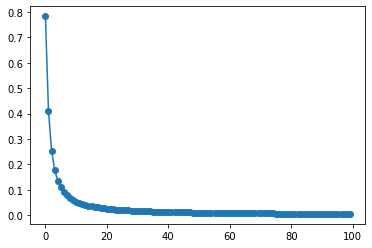

In [5]:
plt.plot(et,'-o')

### Ejemplo de una red neuronal de 2 capas

Se quiere utilizar una red neuronal para predecir el precio de unas casas. Las variables de entrada de las que se disponen son las siguientes:  
- x1: Número de habitaciones  
- x2: Distancia al centro (en km)  
- x3: Superficie (en m2/100)  

De momento, solo se dispone de una casa para entrenar la red neuronal. Esta casa tiene 2 habitaciones, 1.2km de distancia al centro y 220 m2 (x3 = 2.2). Su precio es de 1.213 millones de euros (lo sé, un poco cara).

**SE PIDE**: Implementar una red neuronal con dos capas. La primera capa contiene dos neuronas de tipo tangente hiperbólica, mientras que la segunda capa contiene una única neurona de tipo lineal.  


Implementa un código para entrenar la red y obtener los valores finales de las sinapsis tras 10 pasos de entrenamiento.   

* Utiliza la siguiente nomenclatura: 
    * xi para las variables de entrada
    * wij para las sinapsis que van de la entrada a la primera capa
    * tij para las sinapsis que van de la primera a la segunda capa
    * ui para las entradas de las neuronas
    * zi para las salidas de las neuronas de la primera capa
    * yt para la salida de la red  
    
* Otorga un valor aleatorio inicial a cada una de las sinapsis con la función `np.random.normal(0.5)`  

* Utiliza un learning rate de 0.1

Asegúrate de que la función de error decrece tras cada paso de entrenamiento. Imprime por pantalla el valor de salida de la red tras el entrenamiento.

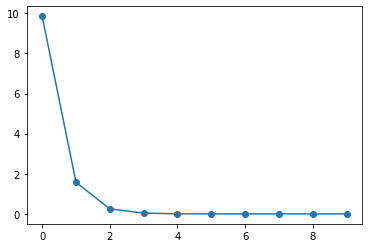

In [20]:
x0 = 1
x1 = 2
x2 = 1.2
x3 = 2.2

y = 1.213

alpha = 0.1

w10 = np.random.normal(0.5)
w11 = np.random.normal(0.5)
w12 = np.random.normal(0.5)
w13 = np.random.normal(0.5)

w20 = np.random.normal(0.5)
w21 = np.random.normal(0.5)
w22 = np.random.normal(0.5)
w23 = np.random.normal(0.5)

t30 = np.random.normal(0.5)
t31 = np.random.normal(0.5)
t32 = np.random.normal(0.5)

error = []
for k in range(10):
    u1 = x0*w10 + x1*w11 + x2*w12 + x3*w13
    u2 = x0*w20 + x1*w21 + x2*w22 + x3*w23
    
    z1 = math.tanh(u1)
    z2 = math.tanh(u2)
    
    u3 = t30 + t31*z1 + t32*z2
    yt = u3
    
    epsilon1 = y - yt
    error.append(epsilon1**2)
    
    # Errores retropropagados
    delta3 = epsilon1
    t30 += 2*alpha*delta3
    t31 += 2*alpha*z1*delta3
    t32 += 2*alpha*z2*delta3
    
    gamma1 = (1-z1**2)*delta3*t31
    gamma2 = (1-z2**2)*delta3*t32
    
    w10 += 2*alpha*x0*gamma1
    w11 += 2*alpha*x1*gamma1
    w12 += 2*alpha*x2*gamma1
    
    w20 += 2*alpha*x0*gamma2
    w21 += 2*alpha*x1*gamma2
    w22 += 2*alpha*x2*gamma2
    
plt.plot(error,'-o')

Utilizando la red neuronal anterior, predice el precio de una casa de 3 habitaciones, 2.1km de distancia al centro y 120 m2.

In [21]:
x0 = 1
x1 = 3
x2 = 2.1
x3 = 120/100

u1 = x0*w10 + x1*w11 + x2*w12 + x3*w13
u2 = x0*w20 + x1*w21 + x2*w22 + x3*w23

z1 = math.tanh(u1)
z2 = math.tanh(u2)

u3 = t30 + z1*t31 + z2*t32

yt = u3

yt

1.2126120207728217

### Multilayer Perceptron (sklearn)

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Utilizaremos el dataset de Boston para regresión y uno de pingüinos para clasificación

#### Clasificación

In [23]:
import seaborn as sns

In [63]:
df = sns.load_dataset("penguins")

# Limpiamos un poco los datos
df.dropna(inplace=True)
cleanup_nums = {"species": {"Adelie": 0,
                            "Chinstrap": 1,
                            "Gentoo": 2},
               "sex": {"Male": 0,
                       "Female": 1}}

df.replace(cleanup_nums, inplace=True)
df = pd.get_dummies(df)

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,0,1


In [64]:
df.species.unique()

array([0, 1, 2], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 8)
(67, 8)
(266,)
(67,)


In [27]:
mlp = MLPClassifier(max_iter=500,
                    hidden_layer_sizes=(10,),
                    activation='tanh')

mlp.fit(X_train,y_train)
mlp.score(X_test,y_test)

0.4626865671641791

In [28]:
mlp.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [29]:
mlp.predict_proba(X_test)

array([[0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.40649787, 0.29994567, 0.29355646],
       [0.

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,mlp.predict(X_test)))
confusion_matrix(y_test,mlp.predict(X_test))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        31
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        23

    accuracy                           0.46        67
   macro avg       0.15      0.33      0.21        67
weighted avg       0.21      0.46      0.29        67



C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[31,  0,  0],
       [13,  0,  0],
       [23,  0,  0]], dtype=int64)

Probemos con una regresión logística

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9850746268656716

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQ_-ZuNGjNonExIDJ4smm-ESuodaVEyCt706FSnKXw55FVk1PiTa-Dp8hsW_RbrHD3rdA&usqp=CAU)

Escalar los datos es fundamental a la hora de entrenar redes neuronales

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [34]:
mlp = MLPClassifier(max_iter=500,activation='tanh',hidden_layer_sizes=(5,))
mlp.fit(X_train_scal,y_train)
mlp.score(X_test_scal,y_test)

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,mlp.predict(X_test_scal)))
confusion_matrix(y_test,mlp.predict(X_test_scal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]], dtype=int64)

#### Regresión

In [39]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, 
                  columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns!='MEDV']
y = df.loc[:,df.columns=='MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [41]:
X_train.shape, y_train.shape

((354, 13), (354, 1))

In [42]:
X_test.shape

(152, 13)

In [43]:
from sklearn.preprocessing import StandardScaler
# Escalar X e y

x_scaled = StandardScaler()
y_scaled = StandardScaler()

x = x_scaled.fit_transform(X_train)
y = y_scaled.fit_transform(y_train)

In [46]:
mlp2 = MLPRegressor(hidden_layer_sizes=(10,),
                   max_iter = 500,
                   activation='tanh')
mlp2.fit(x,y.ravel())

MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), max_iter=500)

In [49]:
# Predecir en train y desnormalizar
pred_train = mlp2.predict(x)
pred_train2 = y_scaled.inverse_transform(pred_train.reshape(-1,1))
pred_train2

array([[33.36096167],
       [28.68344575],
       [24.86363901],
       [17.28015851],
       [15.07958866],
       [33.57769698],
       [30.07089469],
       [19.56662079],
       [20.52252069],
       [29.0308621 ],
       [37.20858133],
       [ 9.66957023],
       [13.08558431],
       [43.41454711],
       [17.46614725],
       [36.95451524],
       [22.8777348 ],
       [13.78133923],
       [32.78678772],
       [22.74986403],
       [27.45891503],
       [31.66998388],
       [44.88368613],
       [33.59566744],
       [22.61794282],
       [29.39004321],
       [17.46832259],
       [24.53172587],
       [31.93527692],
       [19.93491564],
       [35.9063696 ],
       [27.07006829],
       [21.93369511],
       [34.63062966],
       [34.95324663],
       [21.36809797],
       [31.3405474 ],
       [25.11945482],
       [27.58713425],
       [20.19874377],
       [11.4473432 ],
       [27.08013604],
       [10.36290275],
       [13.79696778],
       [11.66818706],
       [23

In [51]:
pred_test = mlp2.predict(x_scaled.transform(X_test))
pred_test2 = y_scaled.inverse_transform(pred_test.reshape(-1,1))
pred_test2

array([[20.32463598],
       [28.4199295 ],
       [41.10507366],
       [20.74184725],
       [29.64948344],
       [34.5102687 ],
       [26.0564445 ],
       [10.10361673],
       [12.94132865],
       [30.64691639],
       [26.11970727],
       [18.60988721],
       [14.80968902],
       [31.39690941],
       [19.12418842],
       [21.48282413],
       [22.15304876],
       [38.30027357],
       [18.0037494 ],
       [18.03994938],
       [17.09594045],
       [23.24487221],
       [32.47504304],
       [36.20194745],
       [29.97398629],
       [23.0691012 ],
       [16.51964642],
       [21.08196001],
       [21.42626   ],
       [21.6365594 ],
       [26.67783312],
       [34.4369801 ],
       [16.77053358],
       [21.07567723],
       [22.83986151],
       [35.29004401],
       [28.22327203],
       [15.66982565],
       [12.56059702],
       [42.71841606],
       [30.63703106],
       [18.26114165],
       [22.00030186],
       [39.38289338],
       [ 9.45087909],
       [25

In [53]:
# Medimos desempeño
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(pred_train2, y_train)
r2_1 = r2_score(pred_train2,y_train)
print('Train Error = ',mse_1)
print('Train R2 = ', r2_1)

mse_2 = mean_squared_error(pred_test2, y_test)
r2_2 = r2_score(pred_test2,y_test)
print('Test Error = ',mse_2)
print('Test R2 = ', r2_2)

Train Error =  13.459890871867882
Train R2 =  0.8017679165125373
Test Error =  23.205171362903865
Test R2 =  0.5888120832240913


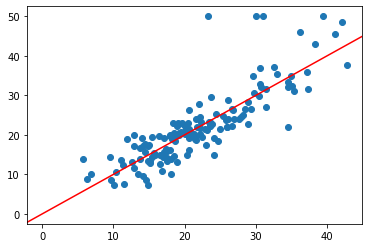

In [54]:
fig, ax = plt.subplots()
plt.plot(pred_test2, y_test, 'o')
plt.axline([0,0],[1,1],color='red')

Intentemos mejorar el desempeño con GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

mlp3 = MLPRegressor()

parameters = {
    'max_iter':[100,200,500],
    'hidden_layer_sizes':[(5,), (10,), (20,), (30,), (20,20), (30,15), (100,100)],
    'activation':['tanh','relu'],
    'solver':['sgd','adam'],
    'alpha':[0.0001,0.05,0.01]
}
clf = GridSearchCV(mlp3, parameters, n_jobs=-1, cv=10)
clf.fit(x,y.ravel())

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.01],
                         'hidden_layer_sizes': [(5,), (10,), (20,), (30,),
                                                (20, 20), (30, 15),
                                                (100, 100)],
                         'max_iter': [100, 200, 500],
                         'solver': ['sgd', 'adam']})

In [58]:
# Mejores parámetros
clf.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100, 100),
 'max_iter': 200,
 'solver': 'adam'}

In [59]:
pred_test = clf.predict(x_scaled.transform(X_test))
pred_test2 = y_scaled.inverse_transform(pred_test.reshape(-1,1))

In [60]:
# Medimos desempeño 
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(pred_train2,y_train)
r2_1 = r2_score(pred_train2,y_train)
print ("Train ERROR = ", mse_1)
print ("Train R2 = ", r2_1)

mse_2 = mean_squared_error(pred_test2,y_test)
r2_2 = r2_score(pred_test2,y_test)
print ("Test ERROR = ", mse_2)
print ("Test R2 = ", r2_2)

Train ERROR =  13.459890871867882
Train R2 =  0.8017679165125373
Test ERROR =  15.145860415722643
Test R2 =  0.7653931275695


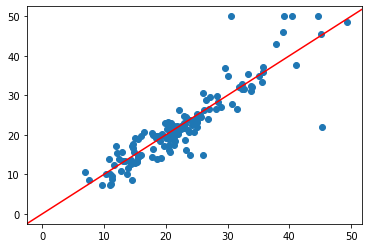

In [61]:
fig, ax = plt.subplots()
plt.plot(pred_test2,y_test,'o')
plt.axline([0,0],[1,1],color='red')